In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
df = pd.read_csv('../levere/NAS.csv')
origdf = pd.read_csv('../levere/NAS.csv')
df.dropna(subset=['Open'], inplace=True)
origdf.dropna(subset=['Open'], inplace=True)

# Converts the Date column to datetime format for use in the plot
origdf["Date"] = pd.to_datetime(origdf["Date"])

# Converts the Date to string for use in the model YYYYMMDD
df[['Year', 'Month', 'Date']] = df.Date.str.split("-",expand=True)
df['Date'] = df['Year'] + df['Month'] + df['Date']
df['Date'] = df['Date'].astype(int)


# Drops all colums except Date and Close
df = df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Year', 'Month'])



In [7]:
df.head()

,Date,Close
0,20031218,19.139799
1,20031219,18.454201
2,20031222,18.054300
3,20031223,17.425800
7,20031229,17.254400


In [8]:
# Sets X to the Date column and y to Close column
X = np.array(df.drop(columns = ['Close']))
y = np.array(df['Close'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

model = RandomForestRegressor(n_estimators = 500, criterion='mse', random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
# Prints out the different metrics of the model

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score: ", model.score(X_test, y_test))

MAE:  1.7095351232928175
MSE:  7.959044989150828
RMSE:  2.8211779435460693
Score:  0.9973986849428079


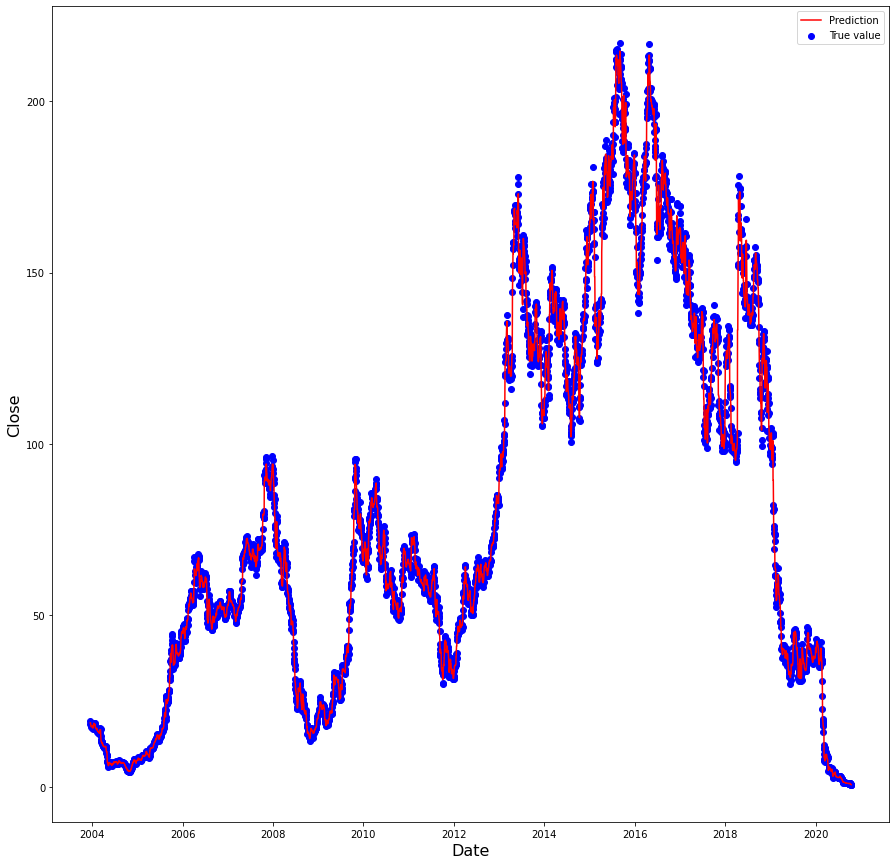

In [11]:
# Sets the figure size and labels
plt.figure(figsize=(15, 15))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close',fontsize=16)

# Blue dots are the correct values
plt.scatter(origdf.Date, df.Close, color='blue')

# Red lines are the predicted values
plt.plot(origdf.Date, model.predict(X), color='red')

plt.legend(['Prediction', 'True value'])

In [20]:
# set inputdate to desired date, format YYYYMMDD example is 19th of January 2017 (20170119)
inputDate = 20070119

# Converts the inputDate variable to np.array
# then reshape it to give it the correct shape for the model
inputDate = np.array(inputDate)
inputDate = inputDate.reshape(-1, 1)

print(model.predict(inputDate))

[55.47133366]
